# Classification

In [2]:
import sys
sys.path.append('../../classification')

import numpy as np
import pandas as pd
from data_preprocessing import KMeansDimensionalityReduction
import model_evaluator
from model_evaluator import metrics_function
import data_import
import sklearn.metrics as metrics
import random
import math

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Import data
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test("Contagio")

## Comparison best features

In [6]:
df_ben = df_tot[df_tot['malware'] == False]
df_mal = df_tot[df_tot['malware'] == True]

ben = np.array(df_ben.sum())
mal = np.array(df_mal.sum())

#print(ben)
#print(mal)

diff = np.abs(ben - mal)
summ = np.abs(ben + mal)
#print(summ)
#print(summ)

rate = np.array(diff / summ)
#print(rate)

df_rate_uns = pd.Series(rate, index=list(df_tot.columns)).drop("malware")
#print(df_rate_uns)
df_rate = df_rate_uns.sort_values(ascending=False)
df_rate_rev = df_rate_uns.sort_values()
print(df_rate)

/Colors          1.000000
/RichMedia       1.000000
/XFA             0.988604
/ObjStm          0.971428
/JBIG2Decode     0.969095
/OpenAction      0.848678
/AA              0.830323
/JavaScript      0.773956
endstream        0.768453
stream           0.767761
/JS              0.758707
endobj           0.742549
obj              0.741606
/Page            0.594955
/Encrypt         0.480315
/AcroForm        0.357867
startxref        0.288893
xref             0.188899
/EmbeddedFile    0.160116
trailer          0.133669
/Launch          0.108434
dtype: float64


In [7]:
f1=[]
fn=[]
acc=[]
for i in range(1, 22):
    columns = list(df_rate[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    
    f1.append(sum(kfold_scores_npv['test_f1_score'])/5)
    fn.append(1-sum(kfold_scores_npv['test_false_neg'])/5)
    acc.append(sum(kfold_scores_npv['test_accuracy_score'])/5)
    
    '''
    print("i = " + str(i))
    if i == 14:
        print(columns)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")
    '''

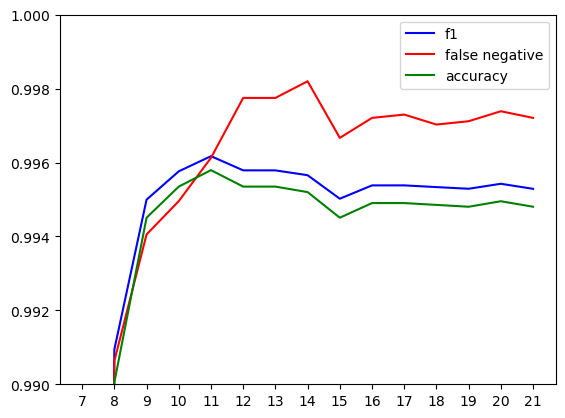

In [8]:
x = np.arange(7, 22, 1)

# plot
fig, ax = plt.subplots()
plt.ylim(0.990, 1)

ax.set_xticks(x)

ax.plot(x, f1[6:], '-b', label='f1')
ax.plot(x, fn[6:], '-r', label='false negative')
ax.plot(x, acc[6:], '-g', label='accuracy')

ax.legend()

plt.show()

In [9]:
df_tot[['/Colors', '/RichMedia', '/XFA', '/ObjStm', '/JBIG2Decode', '/OpenAction', '/AA', '/JavaScript', 'endstream', 'stream', '/JS', 'endobj', 'obj', '/Page']].head()

,/Colors,/RichMedia,/XFA,/ObjStm,/JBIG2Decode,/OpenAction,/AA,/JavaScript,endstream,stream,/JS,endobj,obj,/Page
0,0,0,0,9,0,0,0,0,160,160,0,217,217,7
1,0,0,0,0,0,0,115,1,143,143,1,351,351,2
2,0,0,0,0,0,0,0,0,23,23,0,168,168,4
3,0,0,0,1,0,0,0,0,15,15,0,40,40,4
4,0,0,0,0,0,0,0,0,14,14,0,42,42,2


In [10]:
for i in range(1, 22):
    columns = list(df_rate_uns[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    '''
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")
    '''

In [11]:
for i in range(1, 22):
    columns = list(df_rate_rev[:i].index)
    y_train_cust = np.array(df_tot["malware"])
    X_train_cust = np.array(df_tot[columns])
    
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
    '''
    print("i = " + str(i))
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-------------------------------------")
    '''

## Comparison of Kfold uses
Without Kfold is better

In [12]:
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test('Contagio')
KMDimRed = KMeansDimensionalityReduction(df_tot)
df_tot_km, X_tot_km, X_train_km = KMDimRed.fit_ben_mal_kmeans(df_tot, X_tot, X_train)
X_test_km = KMDimRed.transform_ben_mal_kmeans(X_test)

In [13]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9973549146821374
0.0021396396396396395


In [14]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_km, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9961705349653489
0.003941441441441441


## Comparison of random_state = 0

In [15]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9973549146821374
0.0021396396396396395


In [16]:
clf = DecisionTreeClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9974111429744609
0.0021396396396396395


without random_state=0 result can change, wor

## Testing criterion

In [17]:
for crit in ["gini", "entropy", "log_loss"]:
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("criterion " + crit)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

criterion gini
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------
criterion entropy
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------
criterion log_loss
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------


## Testing splitter

In [18]:
for spli in ["best", "random"]:
    clf = DecisionTreeClassifier(random_state=0, splitter=spli)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("splitter " + spli)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

splitter best
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------
splitter random
0.996904594075507
0.002702702702702703
0.9965980273390462
-----------------


## Testing max_depth (probabile Nobel)

In [19]:
for m in range(2,25,1):
    clf = DecisionTreeClassifier(random_state=0, max_depth=m)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    kfold_scores_npv = metrics_function(y_test, y_pred)
    
    '''
    print("max_depth " + str(m))
    #print(kfold_scores_npv['f1_score'])
    print(kfold_scores_npv['false_neg'])
    #print(kfold_scores_npv['accuracy_score'])
    print("-----------------")
    '''

In [20]:
res = []
for m in range(2,20,1):
    clf = DecisionTreeClassifier(random_state=0, max_depth=m)
    
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=10)
    '''
    print("max_depth " + str(m))
    #print(sum(kfold_scores_npv['test_f1_score'])/3)
    print(sum(kfold_scores_npv['test_false_neg'])/10)
    '''
    res.append(sum(kfold_scores_npv['test_false_neg'])/10)
    '''
    #print(sum(kfold_scores_npv['test_accuracy_score'])/3)
    print("-----------------")
    '''

Best max_depth 15

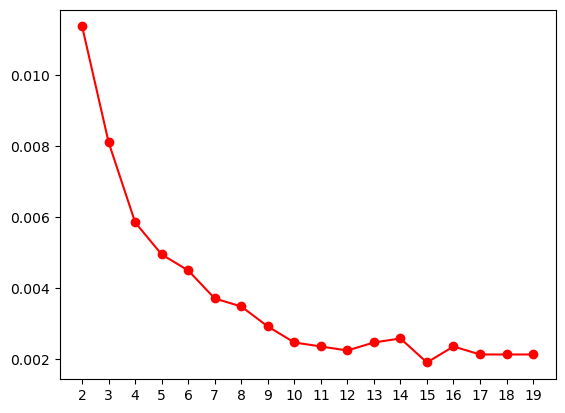

In [21]:
x = np.arange(2, 20, 1)
y = res

# plot
fig, ax = plt.subplots()

ax.set_xticks(x)
#plt.ylim(0.001, 0.006)

ax.plot(x, y, '-ro')

plt.show()

## Conclusion

In [22]:
columns = list(df_rate[:14].index)
y_train_cust = np.array(df_tot["malware"])
X_train_cust = np.array(df_tot[columns])

clf = DecisionTreeClassifier(random_state=0, max_depth=15)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train_cust, y_train_cust, k=5)
print("Train score")
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)
print(sum(kfold_scores_npv['test_accuracy_score'])/5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
kfold_scores_npv = metrics_function(y_test, y_pred)
print("\nTest score")
print(kfold_scores_npv['f1_score'])
print(kfold_scores_npv['false_neg'])
print(kfold_scores_npv['accuracy_score'])

print(clf.get_depth())

Train score
0.9955218532096997
0.0023423423423423423
0.9950512565354057

Test score
0.9977477477477478
0.0022522522522522522
0.9975259772389906
15


Without random_state I can't be under 4.0 _sperimentally_

In [23]:
from sklearn.metrics import roc_curve, plot_confusion_matrix

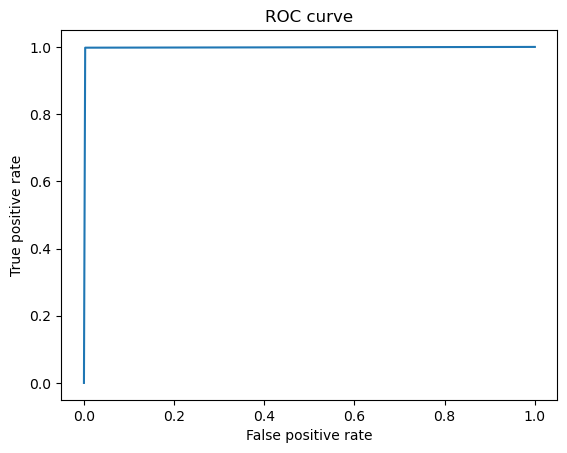

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
#plt.ylim(0.99, 1)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()

/home/ippo/anaconda3/envs/malis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


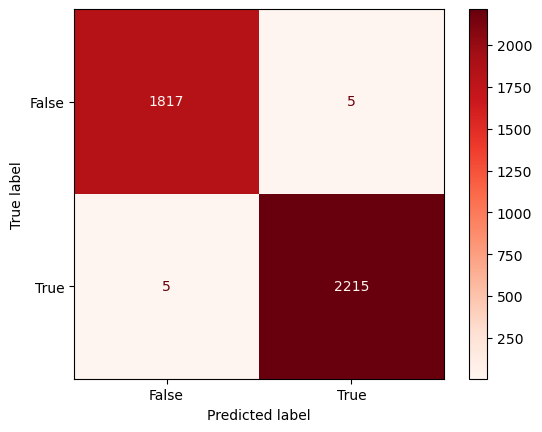

In [25]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

# Evasion (theorical)

In [26]:
average_mal = mal/df_mal.shape[0]
single_pdf = average_mal.astype(int)
pdf = pd.DataFrame(single_pdf.reshape(1,22), columns=df_tot.columns)

X = np.array(pdf)[:,:-1]
y = np.array(pdf["malware"])

pdf

,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,...,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors,malware
0,11,11,3,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Modification of PDF

In [27]:
#print(X)
#X[0,1] = X[0,1] + 1
print(X)

[[11 11  3  3  0  1  0  1  0  0  1  1  0  0  0  0  0  0  0  0  0]]


## Test the forged PDF

In [28]:
for dim in range(X.shape[1]):
    Y = np.copy(X)
    for i in range(1000):
        Y[0,dim] = Y[0,dim] + 1
        y_pred = clf.predict(Y)
        
        if y != y_pred:
            print("Test score with " + str(i) + " more")
            print("\tWRONG label")
            print("\tlabel predicted as " + str(y_pred))
            break

Test score with 63 more
	WRONG label
	label predicted as [False]
Test score with 27 more
	WRONG label
	label predicted as [False]
Test score with 1 more
	WRONG label
	label predicted as [False]


# Evasion (practical)

In [29]:
n = random.randint(1,11100)
pdf = df_mal.iloc[n-1:n]

X = np.array(pdf)[:,:-1]
y = np.array(pdf["malware"])

pdf

,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,...,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors,malware
19116,4,4,1,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,True


## Modification of PDF

In [30]:
for dim in range(X.shape[1]):
    print("Dim: " + df_tot.columns[dim])
    Y = np.copy(X)
    for i in range(1000):
        Y[0,dim] = Y[0,dim] + 1
        y_pred = clf.predict(Y)
        
        if y != y_pred:
            print("\tTest score with " + str(i) + " more")
            print("\tWRONG label")
            print("\tlabel predicted as " + str(y_pred))
            break

Dim: obj
	Test score with 70 more
	WRONG label
	label predicted as [False]
Dim: endobj
	Test score with 34 more
	WRONG label
	label predicted as [False]
Dim: stream
Dim: endstream
Dim: xref
Dim: trailer
Dim: startxref
Dim: /Page
Dim: /Encrypt
Dim: /ObjStm
Dim: /JS
Dim: /JavaScript
Dim: /AA
	Test score with 1 more
	WRONG label
	label predicted as [False]
Dim: /OpenAction
Dim: /AcroForm
Dim: /JBIG2Decode
Dim: /RichMedia
Dim: /Launch
Dim: /EmbeddedFile
Dim: /XFA
Dim: /Colors


## Plot Tree

|--- /JS <= 0.50
|   |--- /XFA <= 0.50
|   |   |--- startxref <= 0.50
|   |   |   |--- class: True
|   |   |--- startxref >  0.50
|   |   |   |--- /Launch <= 0.50
|   |   |   |   |--- /JavaScript <= 0.50
|   |   |   |   |   |--- /Colors <= 0.50
|   |   |   |   |   |   |--- /AA <= 0.50
|   |   |   |   |   |   |   |--- /EmbeddedFile <= 8.50
|   |   |   |   |   |   |   |   |--- xref <= 0.50
|   |   |   |   |   |   |   |   |   |--- obj <= 20.50
|   |   |   |   |   |   |   |   |   |   |--- /Encrypt <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- /Encrypt >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- obj >  20.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- xref >  0.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- /EmbeddedFile >  8.50
|   |   |   |   |   | 

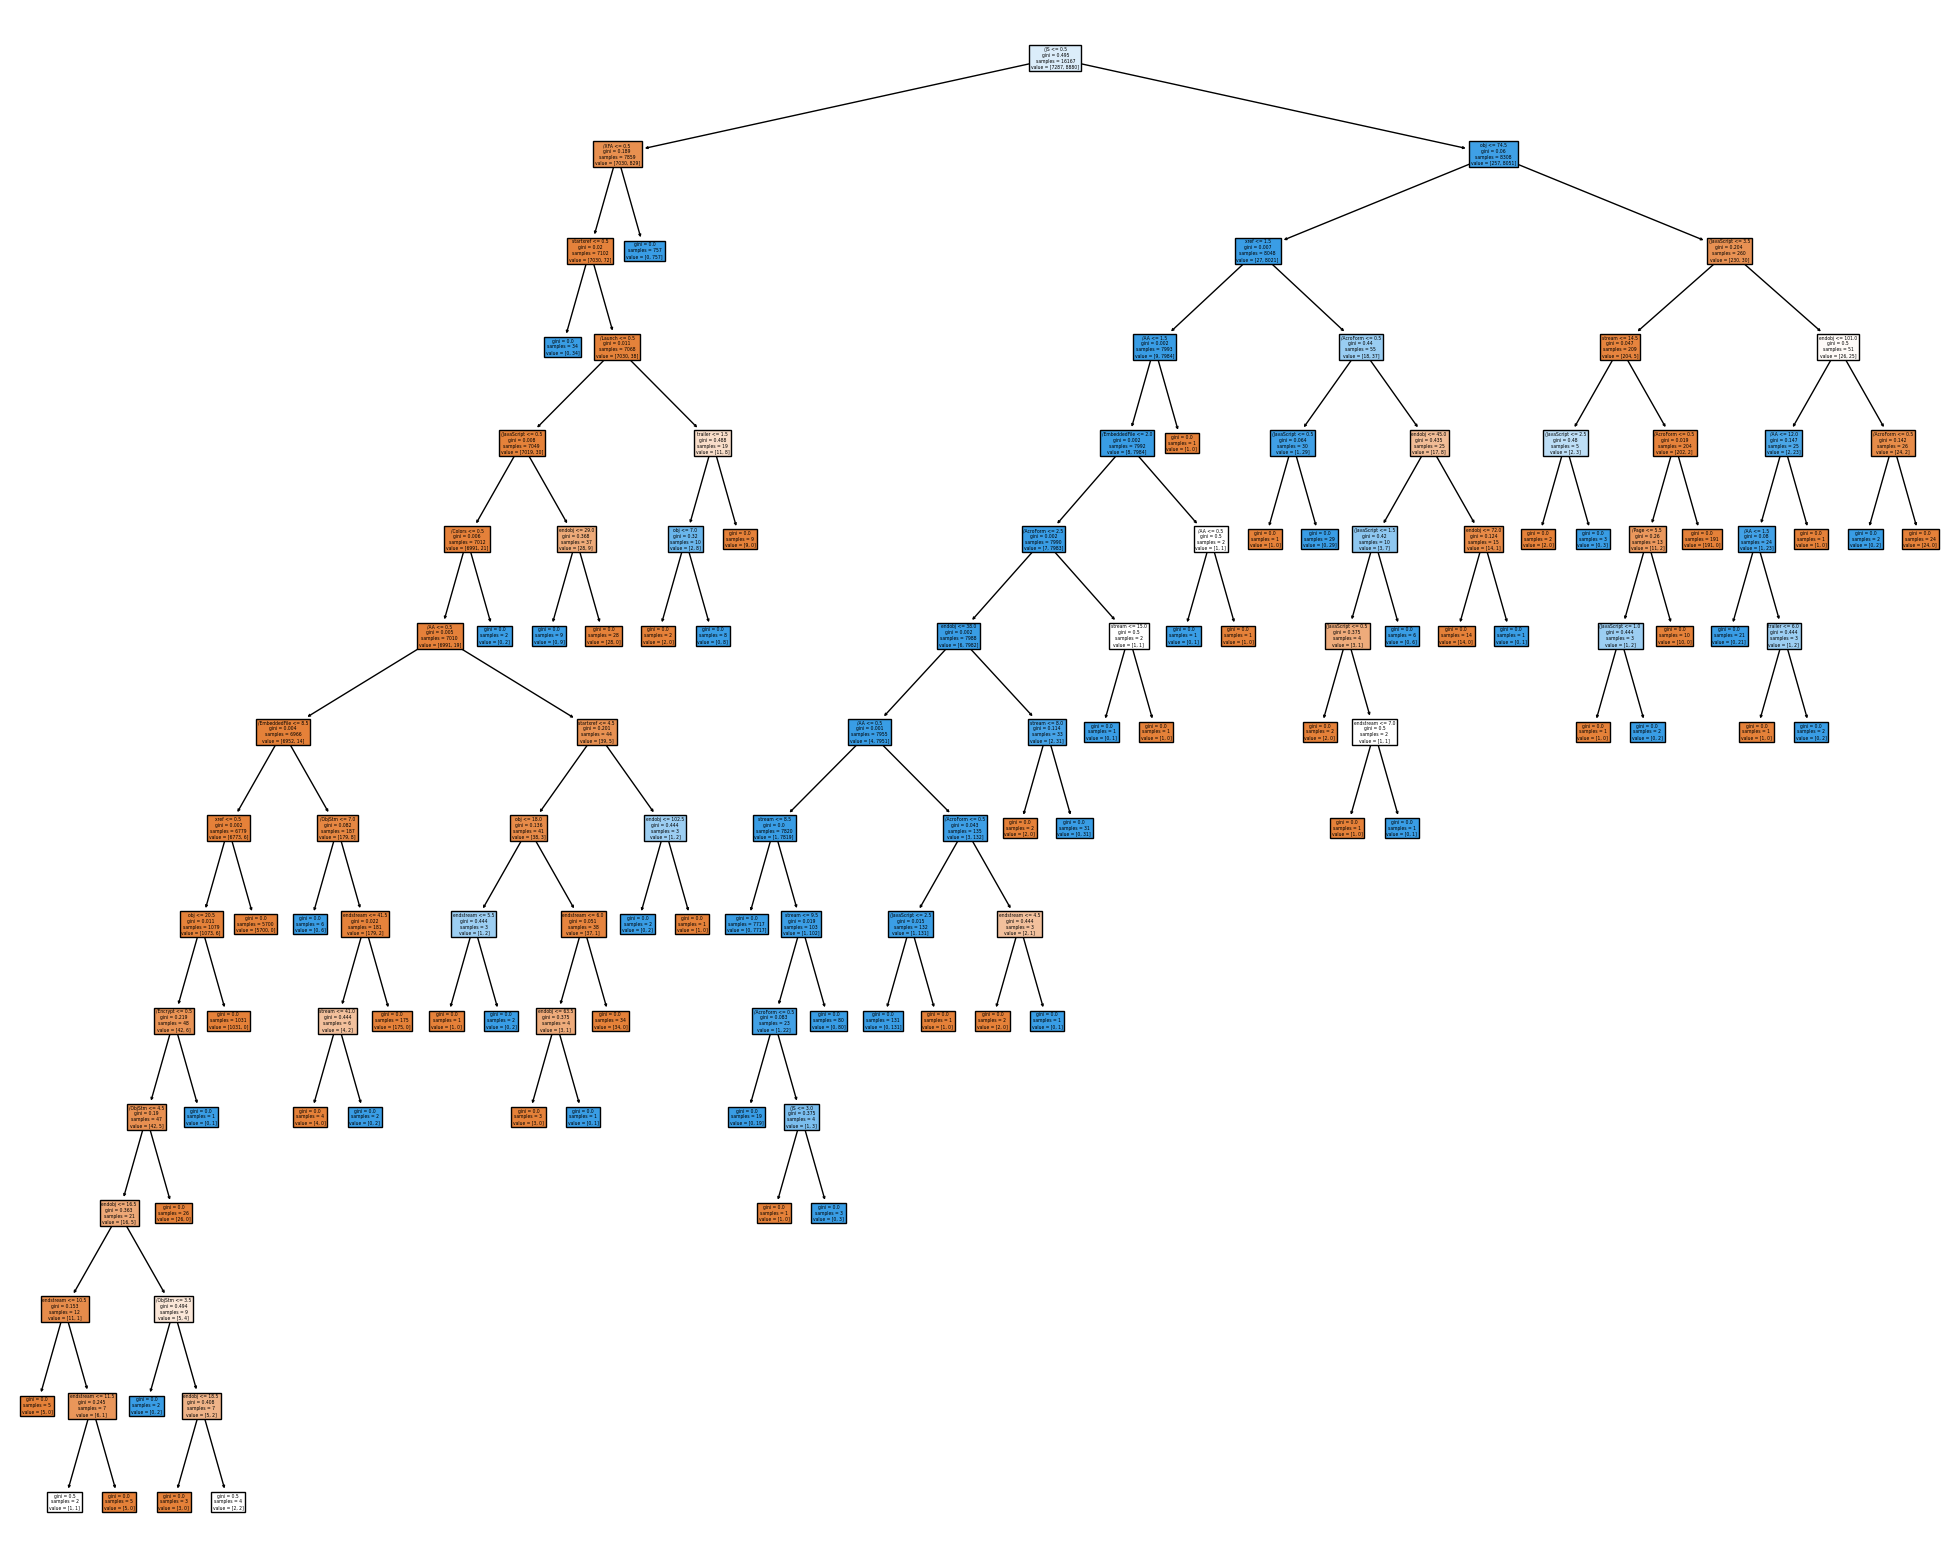

In [32]:
#clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
#kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)

text_representation = tree.export_text(clf, feature_names=list(df_tot.columns)[:-1])
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=list(df_tot.columns)[:-1], filled=True)
plt.show()
fig.savefig("../models/decision_tree/decistion_tree.png")